# MIS780 Advanced AI For Business - Assignment 2 - T2 2023

## Task 3: Weather forecasting with time-series data

**Student Name:** Aman Rajput

**Student ID:** 221069377

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

Accurate temperature prediction in New Delhi holds paramount significance across a spectrum of industries due to its far-reaching impact on various facets of daily life. For example, the energy sector relies on temperature predictions to optimize energy generation and distribution during hot days, ensuring a stable and efficient power supply. Construction firms depend on temperature forecasts to strategize project timelines, manage worker safety, and select appropriate materials for varying weather conditions. Additionally, the tourism industry heavily relies on temperature predictions to attract visitors by offering ideal weather conditions, ultimately bolstering the local economy. In essence, accurate temperature forecasting in Delhi serves as a linchpin for informed decision-making across a multitude of sectors, impacting both economic stability and the daily lives of its residents. Hence, an advanced ML model is necessary in order to forecast weather.

<br>

The dataset used to build LSTM model for predicting temperature, spans from 2013 to 2017, with data from 2013 to 2016 used as the training set and data from 2017 as the testing set. The Recurrent Neural Network (RNN) models employed in this study utilize multivariate data to capture complex temporal patterns and dependencies in the weather data, including wind speed, humidity, mean pressure, and mean temperature, to predict average temperature for a 14-day forecasting horizon (*Section 2*). The selected features play a crucial role in forecasting average temperature as these capture key meteorological variables that influence temperature patterns.

The choice of model depends on specific forecasting requirements and the trade-off between complexity and accuracy, with Model 1 being a balanced choice and Model 2 suitable for capturing intricate long-term dependencies. Performance evaluation reveals that Model 1 (*section 3 Optimization 1*), which uses the Nadam optimizer, offers a balance between simplicity and accuracy. Model 2 (*Section 3 Optimization 2*), incorporating bidirectional LSTM layers and dropout for regularization, demonstrates the potential to capture longer-term dependencies but comes at the cost of increased complexity. Both models outperform the base model (*Section 3 Base Model*)in terms of Mean Absolute Error (MAE) across the forecasting horizon (*Section 4*). Overall, the MAE of the models indicated the difference bwtween real and predicted values, which ranged between 1.6-3 for all models. However, additional features, such as historical weather data, geographical factors, and seasonal variations, could further enhance prediction accuracy. Moreover, considering climate change, air quality, unexpected weather changes and pollution levels can only reinforce developed ML models in accurate forecasting.

<br>

Business Implications:
- The models, particularly the more complex bidirectional LSTM (Model 2), have significantly improved the accuracy of temperature forecasting. This enhanced forecasting capability is vital for various industries like agriculture, energy, and transportation, as it allows for better planning, resource allocation, and risk management.
- Accurate temperature forecasts enable businesses to optimize operations, reduce losses, and make informed decisions, ultimately leading to increased efficiency and potentially higher profits. The impact of these models on temperature forecasting directly translates to improved business resilience and competitiveness in weather-sensitive sectors.
- In addition to businesses, the model can be used by government to plan for any natural disaster or emergency situation that may arise from weather.

<br>

In conclusion, the RNN models showcased promising results in forecasting mean daily temperatures, with different models serving different forecasting needs. Their ability to utilize multivariate weather data makes them valuable tools for predicting temperature trends and aiding various industries that rely on weather forecasts.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

In [ ]:
def custom_date_parser(date_str):
    return pd.to_datetime(date_str, format='%d/%m/%Y')

In [ ]:
#Import dataset

dataset = pd.read_csv(
    '/content/Part3_Weather.csv', index_col='Date', parse_dates=['Date'], date_parser=custom_date_parser,dayfirst=True)

print(dataset.head())

             meantemp   humidity  wind_speed  meanpressure
Date                                                      
2013-01-01  10.000000  84.500000    0.000000     10.156667
2013-01-02   7.400000  92.000000    2.980000     10.178000
2013-01-03   7.166667  87.000000    4.633333     10.186667
2013-01-04   8.666667  71.333333    1.233333     10.171667
2013-01-05   6.000000  86.833333    3.700000     10.165000


In [ ]:
print(dataset.describe())
dataset.isna().sum()

          meantemp     humidity   wind_speed  meanpressure
count  1575.000000  1575.000000  1575.000000   1575.000000
mean     25.231582    60.420115     6.903642     10.105897
std       7.337316    16.956083     4.508803      1.752983
min       6.000000    13.428571     0.000000     -0.030417
25%      18.516667    49.750000     3.700000     10.018750
50%      27.166667    62.380952     6.370000     10.090000
75%      31.142857    72.125000     9.262500     10.151833
max      38.714286    98.000000    42.220000     76.793333


meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

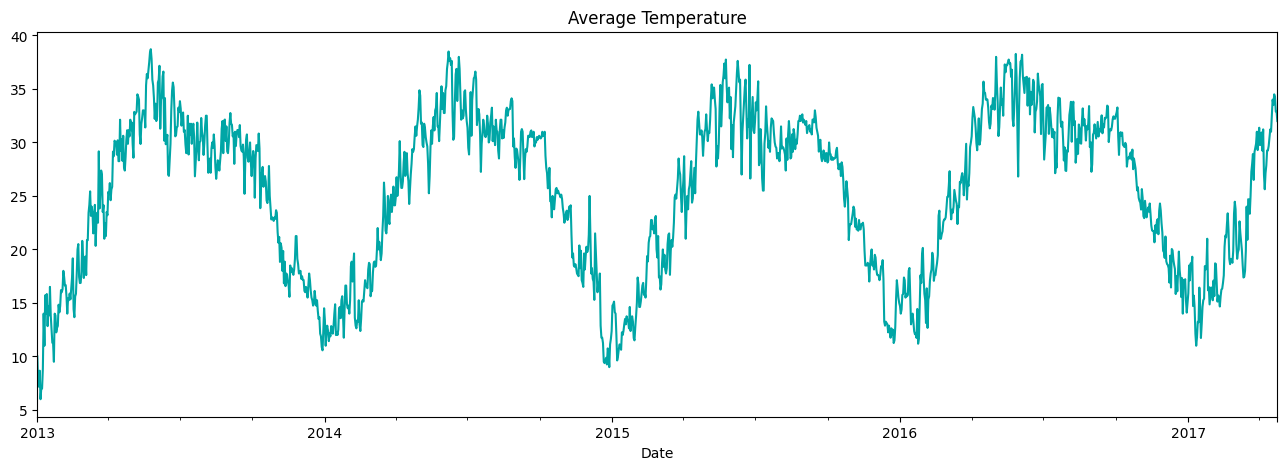

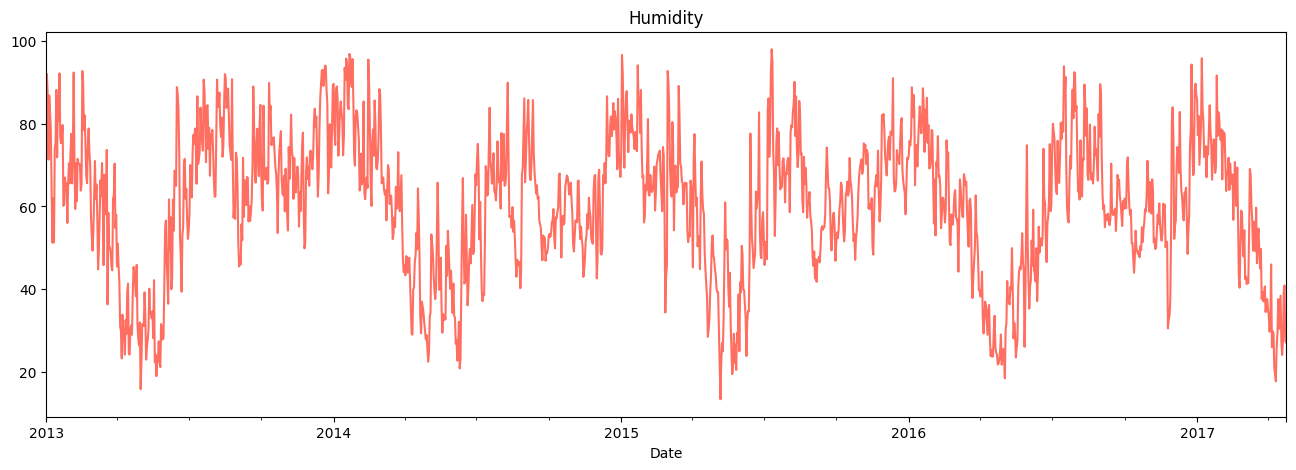

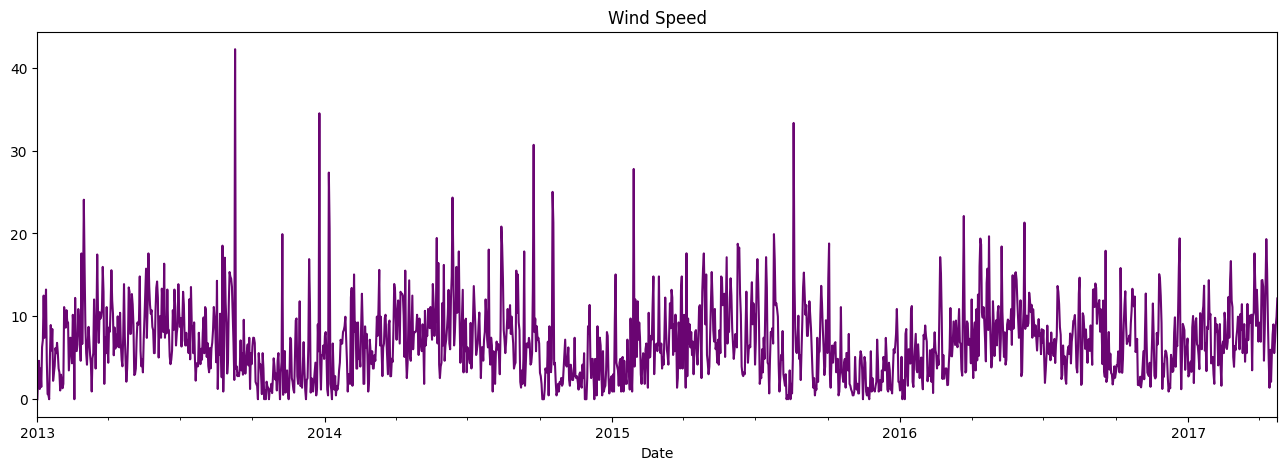

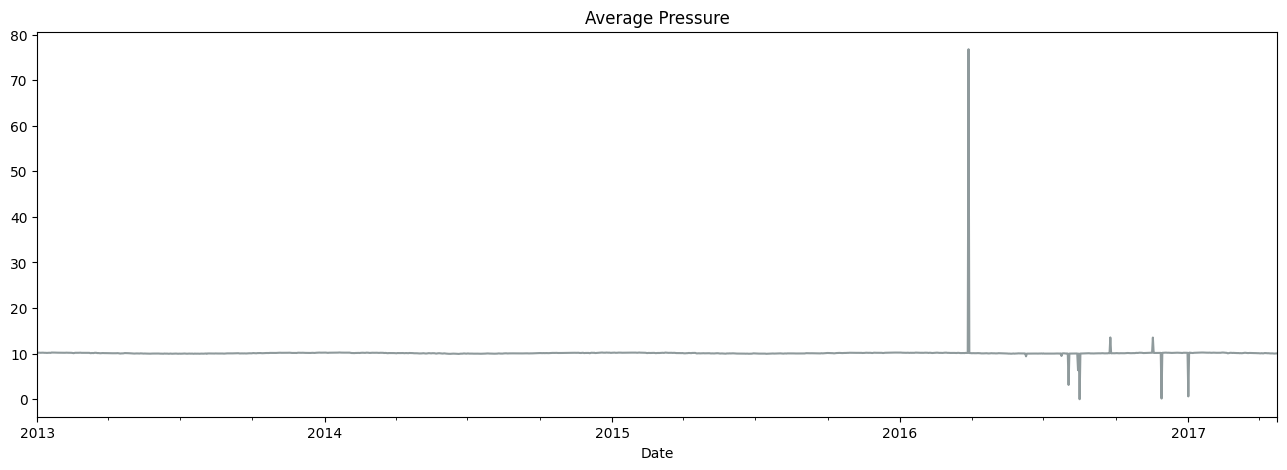

In [ ]:
# Define colors
avg_temp_color = '#00A6A6'
humidity_color = '#FF6F61'
wind_speed_color = '#6A0572'
mean_pressure_color = '#8F9A9C'

# Plotting Average Temperature with the chosen color
dataset['meantemp'].plot(figsize=(16, 5), color=avg_temp_color)
plt.title("Average Temperature")
plt.show()

# Plotting Humidity with the chosen color
dataset['humidity'].plot(figsize=(16, 5), color=humidity_color)
plt.title("Humidity")
plt.show()

# Plotting Wind Speed with the chosen color
dataset['wind_speed'].plot(figsize=(16, 5), color=wind_speed_color)
plt.title("Wind Speed")
plt.show()

# Plotting Average Pressure with the chosen color
dataset['meanpressure'].plot(figsize=(16, 5), color=mean_pressure_color)
plt.title("Average Pressure")
plt.show()


In [ ]:
# Define the start and end years for the training and testing split
tstart = 2013
tend = 2016

# Function to split the dataset into training and testing sets based on date range
def train_test_split(dataset, tstart, tend):
    # Select data from 2013 to 2016 for training set
    train = dataset.loc[f"{tstart}":f"{tend}"]
    # Select data from 2017 onwards for testing set
    test = dataset.loc[f"{tend+1}":]
    return train, test

# Split the dataset into training and testing sets
training_set, test_set = train_test_split(dataset, tstart, tend)

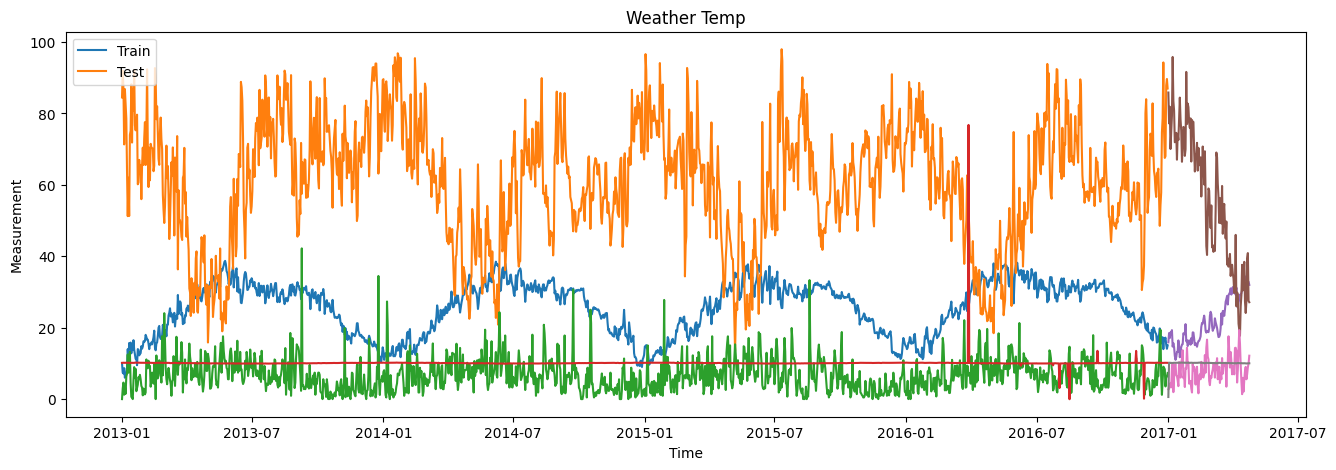

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(training_set)
plt.plot(test_set)
plt.title('Weather Temp')
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.legend(['Train', 'Test'], loc='upper left')

In [ ]:
# Get the shape of the training set and test set
training_set_shape = training_set.shape
test_set_shape = test_set.shape
print('training_set shape:', training_set_shape)
print('test_set shape:', test_set_shape)

training_set shape: (1461, 4)
test_set shape: (114, 4)


In [ ]:
# Create a MinMaxScaler object with a specified feature range (0 to 1)
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.values.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)
print('training_set_scaled shape after scaling:', training_set_scaled.shape)


training_set_scaled shape after scaling: (5844, 1)


In [ ]:
# Transform back to table format with four features
training_set_scaled = training_set_scaled.reshape(training_set_shape[0], training_set_shape[1])
print('training_set_scaled shape:', training_set_scaled.shape)

training_set_scaled shape: (1461, 4)


In [ ]:
#Split a time series sequence into input (X) and output (y) samples for a forecasting

def split_sequence(sequence, n_steps,forecasting_horizon, y_index):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - forecasting_horizon:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:end_ix+forecasting_horizon,y_index]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [ ]:
# Defining model parameters

n_steps = 15 # Models performed best at n_steps = 15 out of 10,15,20,25,40,50,75
forecasting_horizon = 14 # Days to forecast
features = 4 # No of features
y_index = 0 # Index of temp column

# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps,forecasting_horizon,y_index)

In [ ]:
# Reshaping X_train for model
y_train  = y_train.reshape(y_train.shape[0],y_train.shape[1],1)

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (1433, 15, 4)
y_train shape: (1433, 14, 1)


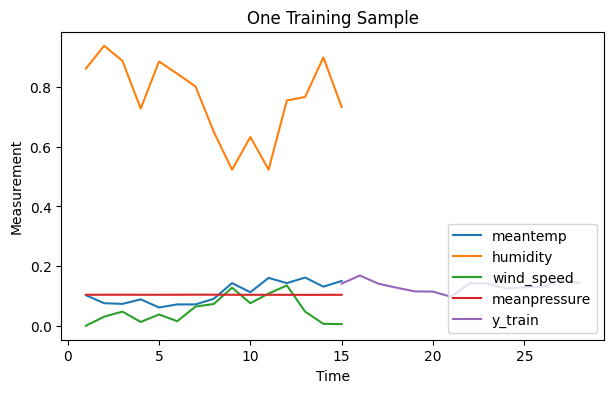

In [ ]:
# Plotting a single training sample with multiple measurements over time

plt.figure(figsize=(7, 4))
plt.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 0], label='meantemp')
plt.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 1], label='humidity')
plt.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 2], label='wind_speed')
plt.plot(np.arange(1, n_steps+1, 1), X_train[0, :, 3], label='meanpressure')
plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), y_train[0, :, 0], label='y_train')
plt.title('One Training Sample')
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.legend(loc='lower right')
plt.show()


<a id = "cell_model"></a>
## 3. Predictive Modeling

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Nadam, Adam
from sklearn.metrics import mean_squared_error

####Base Model

The model architecture is a simple LSTM (Long Short-Term Memory) network with one hidden layer. The first layer is an LSTM layer with 100 units. The LSTM layer is a type of recurrent neural network that is well-suited for time series data. It can learn long-term dependencies between data points, which is important for forecasting tasks. The second layer is a Dense layer with 14 units. The Dense layer is a fully connected layer that outputs the predictions.

In [ ]:
###### Base Model ######

# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=forecasting_horizon))

# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42000     
                                                                 
 dense (Dense)               (None, 14)                1414      
                                                                 
Total params: 43,414
Trainable params: 43,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
45/45 [==============================] - 3s 13ms/step - loss: 0.0091
Epoch 2/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 3/100
45/45 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 4/100
45/45 [==============================] - 1s 13ms/step - loss: 0.0014
Epoch 5/100
45/45 [==============================] - 1s 12ms/step - loss: 0.0013
Epoch 6/100
45/45 [========================

In [ ]:
#scaling
inputs = test_set.values.reshape(-1, 1)
inputs = sc.transform(inputs)

#Reshape back to orignal format after rescaling
inputs = inputs.reshape(test_set_shape[0], test_set_shape[1])

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps,forecasting_horizon,y_index)
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (86, 15, 4)
y_test shape: (86, 14)


In [ ]:
#prediction
predicted_temp = model_lstm.predict(X_test)

#inverse transform the predicted values
predicted_temp = sc.inverse_transform(predicted_temp)
print('predicted_temp shape: ', predicted_temp.shape)

#inverse transform the test labels.
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
y_test = sc.inverse_transform(y_test)

3/3 [==============================] - 0s 6ms/step
predicted_temp shape:  (86, 14)


####Optimization 1

This optimization only varies from base model in terms of optimizer, in order to learn the impact of changing optimizer. The activation function will affect the non-linearity of the model and the smoothness of the predictions. The optimizer will affect the speed and accuracy of the training process. The loss function will affect the way the model is evaluated and how it is penalized for making mistakes. In general, a larger model with more units and a more complex activation function will be able to learn more complex patterns in the data and make more accurate predictions. However, a larger model will also take longer to train and may be more prone to overfitting.

In [ ]:
###### Optimization 1 ######

# Define the LSTM architecture
model1 = Sequential()
model1.add(LSTM(units=100, activation="tanh", input_shape=(n_steps, features))) #Experimented units = 50,100,150
model1.add(Dense(units=14))

# Compile the model
model1.compile(optimizer='Nadam', loss="mse") #Experimented optimizer = Adam, Nadam

# Print the model summary
model1.summary()

model1.fit(X_train, y_train, epochs=100, batch_size=32)
#Experimented epochs = 25, 50, 75, 100; #Experimented batch_size = 16, 32, 64, 128

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               42000     
                                                                 
 dense_1 (Dense)             (None, 14)                1414      
                                                                 
Total params: 43,414
Trainable params: 43,414
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
45/45 [==============================] - 3s 14ms/step - loss: 0.0148
Epoch 2/100
45/45 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 3/100
45/45 [==============================] - 1s 12ms/step - loss: 8.9716e-04
Epoch 4/100
45/45 [==============================] - 1s 14ms/step - loss: 8.6576e-04
Epoch 5/100
45/45 [==============================] - 1s 14ms/step - loss: 8.5573e-04
Epoch 6/100
45/45 [==========

In [ ]:
# scaling
inputs1 = test_set.values.reshape(-1, 1)
inputs1 = sc.transform(inputs1)

#Reshape back to orignal format after rescaling
inputs1 = inputs1.reshape(test_set_shape[0], test_set_shape[1])

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps,forecasting_horizon,y_index)
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (86, 15, 4)
y_test shape: (86, 14)


In [ ]:
#prediction
predicted_temp1 = model1.predict(X_test)

#inverse transform the predicted values
predicted_temp1 = sc.inverse_transform(predicted_temp1)
print('predicted_temp shape1: ', predicted_temp1.shape)

#inverse transform the test labels.
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
y_test = sc.inverse_transform(y_test)

3/3 [==============================] - 0s 7ms/step
predicted_temp shape1:  (86, 14)


###Optimization 2

The following RNN model consists of bidirectional LSTM layers that allow the model to learn dependencies in both the forward and backward directions. This is important for time series data, as it allows the model to learn how past values of the temperature can affect future values. In addition, Dropout layers are used for regularization, which helps to prevent overfitting, which occurs when the model learns the training data too well and is not able to generalize to new data. Aside from dropout layers and Adam optimizer, this model boasts MSE loss function as it is a good choice for regression problems, where the goal is to predict a continuous value. It basically measures the average squared error between the predicted values and the actual values.

Early stopping is another technique that stops training the model when it stops improving on the validation data. This helps to prevent overfitting. Lastly, Learning rate reduction reduces the learning rate of the optimizer when the model stops improving on the validation data. This helps to prevent the model from overfitting and to improve the performance of the model.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the LSTM architecture
model2 = Sequential()

# Bidirectional LSTM layers
model2.add(Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True), input_shape=(n_steps, features)))
model2.add(Dropout(0.2))  # Adding dropout for regularization
model2.add(Bidirectional(LSTM(units=64, activation='tanh')))
model2.add(Dropout(0.2))

# Fully connected layers
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=32, activation='relu'))

# Output layer (predicting average temperature for 14 days)
model2.add(Dense(units=14))

# Compile the model
optimizer = Adam(learning_rate=0.005)
model2.compile(optimizer=optimizer, loss='mse')

# Implement early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Print the model summary
model2.summary()


# Train the new model using your dataset
model2.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 15, 256)          136192    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)               

45/45 [==============================] - 13s 104ms/step - loss: 0.0072 - lr: 0.0050
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.0011

45/45 [==============================] - 5s 101ms/step - loss: 0.0011 - lr: 0.0050
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 9.2323e-04

45/45 [==============================] - 3s 76ms/step - loss: 9.2323e-04 - lr: 0.0050
Epoch 4/100
45/45 [==============================] - ETA: 0s - loss: 0.0010

45/45 [==============================] - 3s 75ms/step - loss: 0.0010 - lr: 0.0050
Epoch 5/100
45/45 [==============================] - ETA: 0s - loss: 8.9825e-04

45/45 [==============================] - 5s 103ms/step - loss: 8.9825e-04 - lr: 0.0050
Epoch 6/100
45/45 [==============================] - ETA: 0s - loss: 8.9019e-04

45/45 [==============================] - 3s 73ms/step - loss: 8.9019e-04 - lr: 0.0050
Epoch 7/100
45/45 [==============================] - ETA: 0s - loss: 9.4711e-04

45/45 [==============================] - 3s 74ms/step - loss: 9.4711e-04 - lr: 0.0050
Epoch 8/100
45/45 [==============================] - ETA: 0s - loss: 8.2024e-04

45/45 [==============================] - 5s 101ms/step - loss: 8.2024e-04 - lr: 0.0050
Epoch 9/100
45/45 [==============================] - ETA: 0s - loss: 7.3470e-04

45/45 [==============================] - 4s 80ms/step - loss: 7.3470e-04 - lr: 0.0050
Epoch 10/100
45/45 [==============================] - ETA: 0s - loss: 7.7707e-04

45/45 [==============================] - 3s 71ms/step - loss: 7.7707e-04 - lr: 0.0050
Epoch 11/100
45/45 [==============================] - ETA: 0s - loss: 7.6929e-04

45/45 [==============================] - 3s 74ms/step - loss: 7.6929e-04 - lr: 0.0050
Epoch 12/100
45/45 [==============================] - ETA: 0s - loss: 7.3469e-04

45/45 [==============================] - 5s 103ms/step - loss: 7.3469e-04 - lr: 0.0050
Epoch 13/100
45/45 [==============================] - ETA: 0s - loss: 7.6609e-04

45/45 [==============================] - 3s 75ms/step - loss: 7.6609e-04 - lr: 0.0050
Epoch 14/100
45/45 [==============================] - ETA: 0s - loss: 7.1969e-04

45/45 [==============================] - 3s 71ms/step - loss: 7.1969e-04 - lr: 0.0050
Epoch 15/100
45/45 [==============================] - ETA: 0s - loss: 7.3048e-04

45/45 [==============================] - 5s 104ms/step - loss: 7.3048e-04 - lr: 0.0050
Epoch 16/100
45/45 [==============================] - ETA: 0s - loss: 6.9275e-04

45/45 [==============================] - 3s 73ms/step - loss: 6.9275e-04 - lr: 0.0050
Epoch 17/100
45/45 [==============================] - ETA: 0s - loss: 7.6870e-04

45/45 [==============================] - 3s 75ms/step - loss: 7.6870e-04 - lr: 0.0050
Epoch 18/100
45/45 [==============================] - ETA: 0s - loss: 8.0926e-04

45/45 [==============================] - 3s 74ms/step - loss: 8.0926e-04 - lr: 0.0050
Epoch 19/100
45/45 [==============================] - ETA: 0s - loss: 6.8742e-04

45/45 [==============================] - 5s 105ms/step - loss: 6.8742e-04 - lr: 0.0050
Epoch 20/100
45/45 [==============================] - ETA: 0s - loss: 6.4629e-04

45/45 [==============================] - 3s 74ms/step - loss: 6.4629e-04 - lr: 0.0050
Epoch 21/100
45/45 [==============================] - ETA: 0s - loss: 6.6821e-04

45/45 [==============================] - 3s 75ms/step - loss: 6.6821e-04 - lr: 0.0050
Epoch 22/100
45/45 [==============================] - ETA: 0s - loss: 6.5603e-04

45/45 [==============================] - 5s 105ms/step - loss: 6.5603e-04 - lr: 0.0050
Epoch 23/100
45/45 [==============================] - ETA: 0s - loss: 6.9396e-04

45/45 [==============================] - 3s 75ms/step - loss: 6.9396e-04 - lr: 0.0050
Epoch 24/100
45/45 [==============================] - ETA: 0s - loss: 6.8869e-04

45/45 [==============================] - 3s 77ms/step - loss: 6.8869e-04 - lr: 0.0050
Epoch 25/100
45/45 [==============================] - ETA: 0s - loss: 6.8141e-04

45/45 [==============================] - 4s 86ms/step - loss: 6.8141e-04 - lr: 0.0050
Epoch 26/100
45/45 [==============================] - ETA: 0s - loss: 6.4610e-04

45/45 [==============================] - 4s 91ms/step - loss: 6.4610e-04 - lr: 0.0050
Epoch 27/100
45/45 [==============================] - ETA: 0s - loss: 6.4854e-04

45/45 [==============================] - 4s 78ms/step - loss: 6.4854e-04 - lr: 0.0050
Epoch 28/100
45/45 [==============================] - ETA: 0s - loss: 6.4511e-04

45/45 [==============================] - 3s 74ms/step - loss: 6.4511e-04 - lr: 0.0050
Epoch 29/100
45/45 [==============================] - ETA: 0s - loss: 6.6924e-04

45/45 [==============================] - 5s 108ms/step - loss: 6.6924e-04 - lr: 0.0050
Epoch 30/100
45/45 [==============================] - ETA: 0s - loss: 6.8697e-04

45/45 [==============================] - 3s 75ms/step - loss: 6.8697e-04 - lr: 0.0050
Epoch 31/100
45/45 [==============================] - ETA: 0s - loss: 6.7159e-04

45/45 [==============================] - 3s 77ms/step - loss: 6.7159e-04 - lr: 0.0050
Epoch 32/100
45/45 [==============================] - ETA: 0s - loss: 6.4397e-04

45/45 [==============================] - 5s 108ms/step - loss: 6.4397e-04 - lr: 0.0050
Epoch 33/100
45/45 [==============================] - ETA: 0s - loss: 6.8335e-04

45/45 [==============================] - 5s 106ms/step - loss: 6.8335e-04 - lr: 0.0050
Epoch 34/100
45/45 [==============================] - ETA: 0s - loss: 6.4830e-04

45/45 [==============================] - 3s 78ms/step - loss: 6.4830e-04 - lr: 0.0050
Epoch 35/100
45/45 [==============================] - ETA: 0s - loss: 6.3333e-04

45/45 [==============================] - 5s 104ms/step - loss: 6.3333e-04 - lr: 0.0050
Epoch 36/100
45/45 [==============================] - ETA: 0s - loss: 6.1936e-04

45/45 [==============================] - 3s 72ms/step - loss: 6.1936e-04 - lr: 0.0050
Epoch 37/100
45/45 [==============================] - ETA: 0s - loss: 6.0270e-04

45/45 [==============================] - 3s 71ms/step - loss: 6.0270e-04 - lr: 0.0050
Epoch 38/100
45/45 [==============================] - ETA: 0s - loss: 6.2097e-04

45/45 [==============================] - 4s 84ms/step - loss: 6.2097e-04 - lr: 0.0050
Epoch 39/100
45/45 [==============================] - ETA: 0s - loss: 6.3066e-04

45/45 [==============================] - 4s 96ms/step - loss: 6.3066e-04 - lr: 0.0050
Epoch 40/100
45/45 [==============================] - ETA: 0s - loss: 6.0112e-04

45/45 [==============================] - 3s 72ms/step - loss: 6.0112e-04 - lr: 0.0050
Epoch 41/100
45/45 [==============================] - ETA: 0s - loss: 6.2305e-04

45/45 [==============================] - 3s 72ms/step - loss: 6.2305e-04 - lr: 0.0050
Epoch 42/100
45/45 [==============================] - ETA: 0s - loss: 6.5556e-04

45/45 [==============================] - 5s 104ms/step - loss: 6.5556e-04 - lr: 0.0050
Epoch 43/100
45/45 [==============================] - ETA: 0s - loss: 6.7762e-04

45/45 [==============================] - 3s 76ms/step - loss: 6.7762e-04 - lr: 0.0050
Epoch 44/100
45/45 [==============================] - ETA: 0s - loss: 6.2888e-04

45/45 [==============================] - 3s 74ms/step - loss: 6.2888e-04 - lr: 0.0050
Epoch 45/100
45/45 [==============================] - ETA: 0s - loss: 5.8635e-04

45/45 [==============================] - 4s 97ms/step - loss: 5.8635e-04 - lr: 0.0050
Epoch 46/100
45/45 [==============================] - ETA: 0s - loss: 6.1566e-04

45/45 [==============================] - 4s 85ms/step - loss: 6.1566e-04 - lr: 0.0050
Epoch 47/100
45/45 [==============================] - ETA: 0s - loss: 5.9310e-04

45/45 [==============================] - 4s 81ms/step - loss: 5.9310e-04 - lr: 0.0050
Epoch 48/100
45/45 [==============================] - ETA: 0s - loss: 6.1062e-04

45/45 [==============================] - 4s 82ms/step - loss: 6.1062e-04 - lr: 0.0050
Epoch 49/100
45/45 [==============================] - ETA: 0s - loss: 6.4535e-04

45/45 [==============================] - 5s 100ms/step - loss: 6.4535e-04 - lr: 0.0050
Epoch 50/100
45/45 [==============================] - ETA: 0s - loss: 5.8227e-04

45/45 [==============================] - 4s 80ms/step - loss: 5.8227e-04 - lr: 0.0050
Epoch 51/100
45/45 [==============================] - ETA: 0s - loss: 5.7223e-04

45/45 [==============================] - 3s 72ms/step - loss: 5.7223e-04 - lr: 0.0050
Epoch 52/100
45/45 [==============================] - ETA: 0s - loss: 5.9608e-04

45/45 [==============================] - 5s 106ms/step - loss: 5.9608e-04 - lr: 0.0050
Epoch 53/100
45/45 [==============================] - ETA: 0s - loss: 5.6671e-04

45/45 [==============================] - 3s 76ms/step - loss: 5.6671e-04 - lr: 0.0050
Epoch 54/100
45/45 [==============================] - ETA: 0s - loss: 5.5446e-04

45/45 [==============================] - 3s 77ms/step - loss: 5.5446e-04 - lr: 0.0050
Epoch 55/100
45/45 [==============================] - ETA: 0s - loss: 5.8104e-04

45/45 [==============================] - 4s 100ms/step - loss: 5.8104e-04 - lr: 0.0050
Epoch 56/100
45/45 [==============================] - ETA: 0s - loss: 5.5647e-04

45/45 [==============================] - 4s 81ms/step - loss: 5.5647e-04 - lr: 0.0050
Epoch 57/100
45/45 [==============================] - ETA: 0s - loss: 5.6922e-04

45/45 [==============================] - 3s 76ms/step - loss: 5.6922e-04 - lr: 0.0050
Epoch 58/100
45/45 [==============================] - ETA: 0s - loss: 5.4737e-04

45/45 [==============================] - 3s 75ms/step - loss: 5.4737e-04 - lr: 0.0050
Epoch 59/100
45/45 [==============================] - ETA: 0s - loss: 5.4193e-04

45/45 [==============================] - 5s 102ms/step - loss: 5.4193e-04 - lr: 0.0050
Epoch 60/100
45/45 [==============================] - ETA: 0s - loss: 5.7477e-04

45/45 [==============================] - 3s 72ms/step - loss: 5.7477e-04 - lr: 0.0050
Epoch 61/100
45/45 [==============================] - ETA: 0s - loss: 5.8800e-04

45/45 [==============================] - 3s 73ms/step - loss: 5.8800e-04 - lr: 0.0050
Epoch 62/100
45/45 [==============================] - ETA: 0s - loss: 5.5732e-04

45/45 [==============================] - 5s 105ms/step - loss: 5.5732e-04 - lr: 0.0050
Epoch 63/100
45/45 [==============================] - ETA: 0s - loss: 5.7271e-04

45/45 [==============================] - 3s 74ms/step - loss: 5.7271e-04 - lr: 0.0050
Epoch 64/100
45/45 [==============================] - ETA: 0s - loss: 5.8779e-04

45/45 [==============================] - 3s 74ms/step - loss: 5.8779e-04 - lr: 0.0050
Epoch 65/100
45/45 [==============================] - ETA: 0s - loss: 5.9403e-04

45/45 [==============================] - 4s 89ms/step - loss: 5.9403e-04 - lr: 0.0050
Epoch 66/100
45/45 [==============================] - ETA: 0s - loss: 5.7548e-04

45/45 [==============================] - 4s 91ms/step - loss: 5.7548e-04 - lr: 0.0050
Epoch 67/100
45/45 [==============================] - ETA: 0s - loss: 5.5871e-04

45/45 [==============================] - 3s 74ms/step - loss: 5.5871e-04 - lr: 0.0050
Epoch 68/100
45/45 [==============================] - ETA: 0s - loss: 5.4605e-04

45/45 [==============================] - 3s 75ms/step - loss: 5.4605e-04 - lr: 0.0050
Epoch 69/100
45/45 [==============================] - ETA: 0s - loss: 5.1825e-04

45/45 [==============================] - 5s 106ms/step - loss: 5.1825e-04 - lr: 0.0050
Epoch 70/100
45/45 [==============================] - ETA: 0s - loss: 5.1067e-04

45/45 [==============================] - 5s 111ms/step - loss: 5.1067e-04 - lr: 0.0050
Epoch 71/100
45/45 [==============================] - ETA: 0s - loss: 5.4122e-04

45/45 [==============================] - 4s 79ms/step - loss: 5.4122e-04 - lr: 0.0050
Epoch 72/100
45/45 [==============================] - ETA: 0s - loss: 5.2670e-04

45/45 [==============================] - 5s 107ms/step - loss: 5.2670e-04 - lr: 0.0050
Epoch 73/100
45/45 [==============================] - ETA: 0s - loss: 5.3785e-04

45/45 [==============================] - 3s 76ms/step - loss: 5.3785e-04 - lr: 0.0050
Epoch 74/100
45/45 [==============================] - ETA: 0s - loss: 5.1446e-04

45/45 [==============================] - 3s 77ms/step - loss: 5.1446e-04 - lr: 0.0050
Epoch 75/100
45/45 [==============================] - ETA: 0s - loss: 5.3704e-04

45/45 [==============================] - 5s 106ms/step - loss: 5.3704e-04 - lr: 0.0050
Epoch 76/100
45/45 [==============================] - ETA: 0s - loss: 5.5377e-04

45/45 [==============================] - 3s 78ms/step - loss: 5.5377e-04 - lr: 0.0050
Epoch 77/100
45/45 [==============================] - ETA: 0s - loss: 5.1760e-04

45/45 [==============================] - 4s 78ms/step - loss: 5.1760e-04 - lr: 0.0050
Epoch 78/100
45/45 [==============================] - ETA: 0s - loss: 5.1155e-04

45/45 [==============================] - 5s 101ms/step - loss: 5.1155e-04 - lr: 0.0050
Epoch 79/100
45/45 [==============================] - ETA: 0s - loss: 5.0892e-04

45/45 [==============================] - 4s 80ms/step - loss: 5.0892e-04 - lr: 0.0050
Epoch 80/100
45/45 [==============================] - ETA: 0s - loss: 4.7941e-04

45/45 [==============================] - 3s 73ms/step - loss: 4.7941e-04 - lr: 0.0050
Epoch 81/100
45/45 [==============================] - ETA: 0s - loss: 4.9635e-04

45/45 [==============================] - 3s 73ms/step - loss: 4.9635e-04 - lr: 0.0050
Epoch 82/100
45/45 [==============================] - ETA: 0s - loss: 4.9215e-04

45/45 [==============================] - 5s 109ms/step - loss: 4.9215e-04 - lr: 0.0050
Epoch 83/100
45/45 [==============================] - ETA: 0s - loss: 4.9101e-04

45/45 [==============================] - 3s 73ms/step - loss: 4.9101e-04 - lr: 0.0050
Epoch 85/100
45/45 [==============================] - ETA: 0s - loss: 4.9193e-04

45/45 [==============================] - 5s 106ms/step - loss: 4.9193e-04 - lr: 0.0050
Epoch 86/100
45/45 [==============================] - ETA: 0s - loss: 5.1153e-04

45/45 [==============================] - 3s 76ms/step - loss: 5.1153e-04 - lr: 0.0050
Epoch 87/100
45/45 [==============================] - ETA: 0s - loss: 5.1918e-04

45/45 [==============================] - 3s 77ms/step - loss: 5.1918e-04 - lr: 0.0050
Epoch 88/100
45/45 [==============================] - ETA: 0s - loss: 4.7422e-04

45/45 [==============================] - 4s 84ms/step - loss: 4.7422e-04 - lr: 0.0050
Epoch 89/100
45/45 [==============================] - ETA: 0s - loss: 4.6552e-04

45/45 [==============================] - 4s 92ms/step - loss: 4.6552e-04 - lr: 0.0050
Epoch 90/100
45/45 [==============================] - ETA: 0s - loss: 4.8433e-04

45/45 [==============================] - 3s 71ms/step - loss: 4.8433e-04 - lr: 0.0050
Epoch 91/100
45/45 [==============================] - ETA: 0s - loss: 5.2210e-04

45/45 [==============================] - 3s 77ms/step - loss: 5.2210e-04 - lr: 0.0050
Epoch 92/100
45/45 [==============================] - ETA: 0s - loss: 4.7294e-04

45/45 [==============================] - 5s 102ms/step - loss: 4.7294e-04 - lr: 0.0050
Epoch 93/100
45/45 [==============================] - ETA: 0s - loss: 5.8207e-04

45/45 [==============================] - 3s 74ms/step - loss: 5.8207e-04 - lr: 0.0050
Epoch 94/100
45/45 [==============================] - ETA: 0s - loss: 4.7694e-04

45/45 [==============================] - 3s 77ms/step - loss: 4.7694e-04 - lr: 0.0050
Epoch 95/100
45/45 [==============================] - ETA: 0s - loss: 5.0771e-04

45/45 [==============================] - 5s 103ms/step - loss: 5.0771e-04 - lr: 0.0050
Epoch 96/100
45/45 [==============================] - ETA: 0s - loss: 4.7825e-04

45/45 [==============================] - 3s 75ms/step - loss: 4.7825e-04 - lr: 0.0050
Epoch 97/100
45/45 [==============================] - ETA: 0s - loss: 4.4981e-04

45/45 [==============================] - 4s 78ms/step - loss: 4.4981e-04 - lr: 0.0050
Epoch 98/100
45/45 [==============================] - ETA: 0s - loss: 4.5719e-04

45/45 [==============================] - 7s 167ms/step - loss: 4.5719e-04 - lr: 0.0050
Epoch 99/100
45/45 [==============================] - ETA: 0s - loss: 4.6495e-04

45/45 [==============================] - 4s 95ms/step - loss: 4.6495e-04 - lr: 0.0050
Epoch 100/100
45/45 [==============================] - ETA: 0s - loss: 4.5663e-04

45/45 [==============================] - 3s 75ms/step - loss: 4.5663e-04 - lr: 0.0050


In [ ]:
# scaling
inputs2 = test_set.values.reshape(-1, 1)
inputs2 = sc.transform(inputs2)

#Reshape back to orignal format after rescaling
inputs2 = inputs2.reshape(test_set_shape[0], test_set_shape[1])

# Split into samples
X_test, y_test = split_sequence(inputs2, n_steps,forecasting_horizon,y_index)
number_test_samples = X_test.shape[0]
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (86, 15, 4)
y_test shape: (86, 14)


In [ ]:
#prediction
predicted_temp2 = model2.predict(X_test)

#inverse transform the predicted values
predicted_temp2 = sc.inverse_transform(predicted_temp2)
print('predicted_temp shape1: ', predicted_temp2.shape)

#inverse transform the test labels.
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])
y_test = sc.inverse_transform(y_test)

3/3 [==============================] - 2s 36ms/step
predicted_temp shape1:  (86, 14)


<a id = "cell_report"></a>
## 4. Experiments Report

#### Base Model

In [ ]:
X_test = X_test.reshape(-1, 15) # Reshape the test data to match the original shape
X_test = sc.inverse_transform(X_test) # Inverse transform the scaled test data to its original values
X_test = X_test.reshape(number_test_samples, 15, 4) # Reshape the test data to its original format, considering the number of test samples, time steps, and features

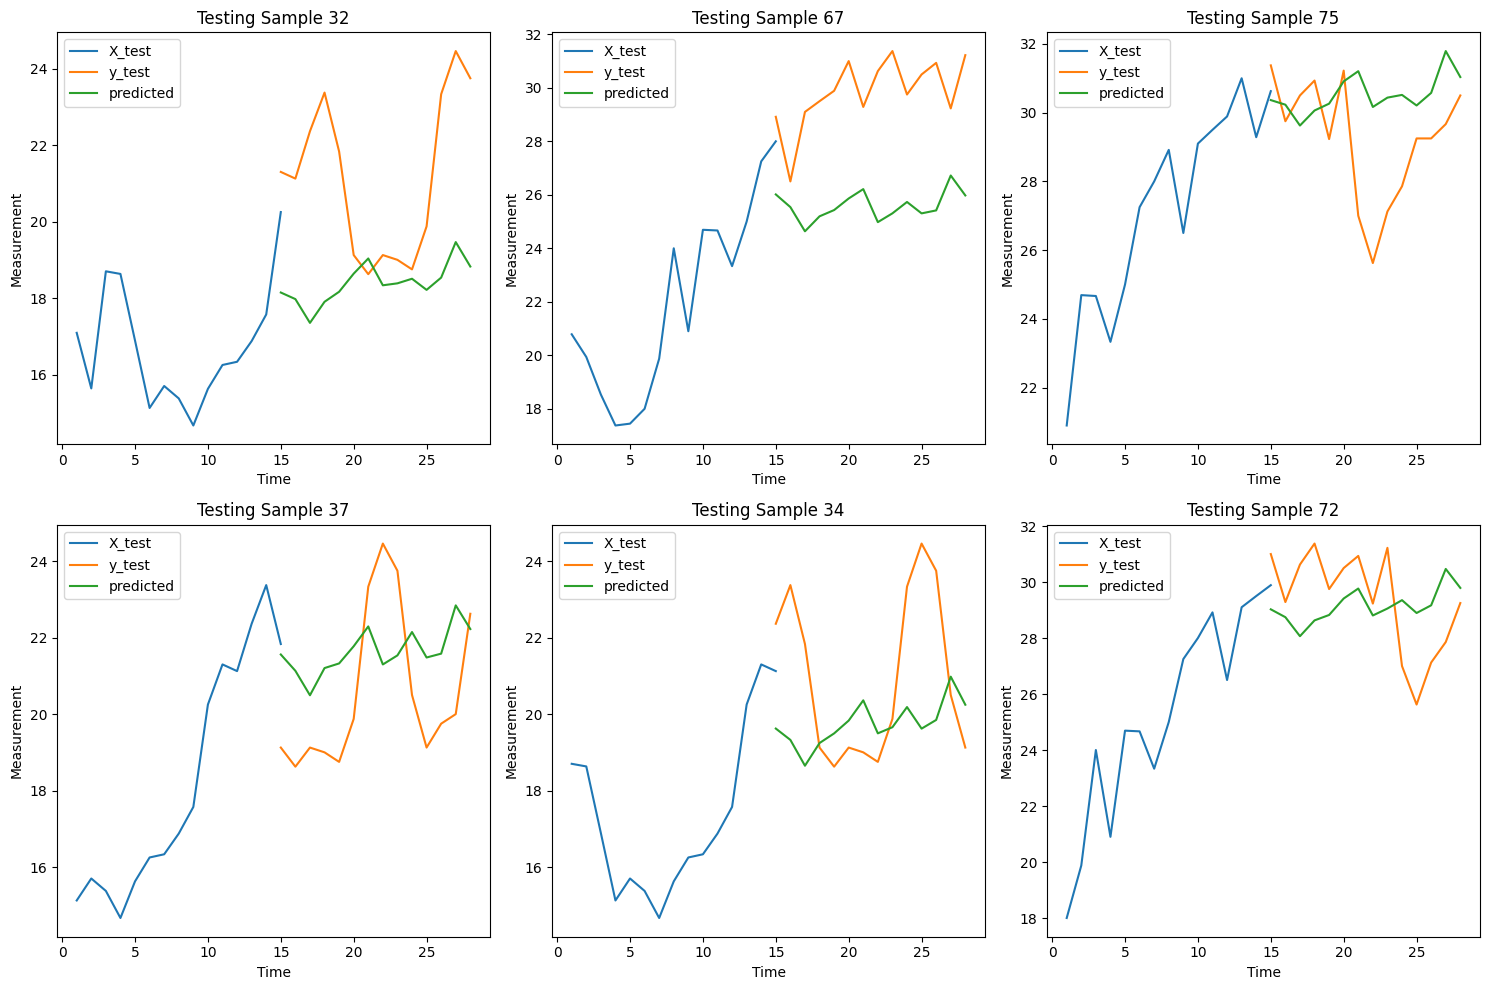

In [ ]:
# Number of random samples to display
num_samples = 6

# Create a grid for plotting
plt.figure(figsize=(15, 10))

# Iterate through the selected random samples
for i in range(num_samples):
    plt.subplot(2, 3, i+1)  # Create a subplot in the 2x3 grid
    sample_index = np.random.randint(0, len(X_test))  # Randomly select a sample index

    plt.plot(np.arange(1, n_steps+1, 1), X_test[sample_index, :, 0])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), y_test[sample_index, :])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), predicted_temp[sample_index, :])

    plt.title('Testing Sample ' + str(sample_index))
    plt.ylabel('Measurement')
    plt.xlabel('Time')
    plt.legend(['X_test', 'y_test', 'predicted'], loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The sample vizualization show some overfitting across the predictions, which is not much desirable. Yet it can be concluded that the model failed to predict large variations suggests that the model has learned to fit the training data too closely, capturing noise or random fluctuations rather than the underlying patterns. As a result, when faced with new or unseen data, the model struggles to generalize and predict accurately, particularly for large variations.

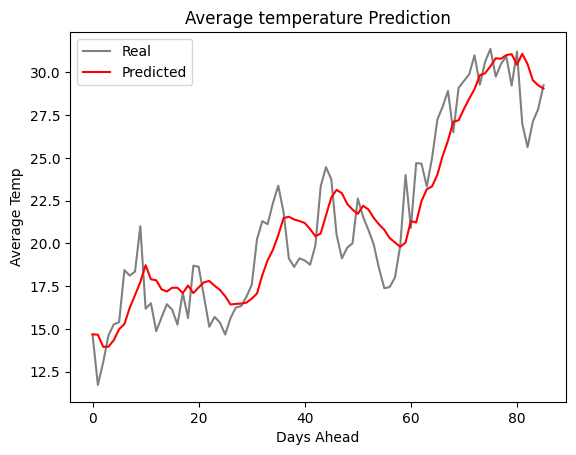

In [ ]:
#Visualize the real vs. predicted values for one day forecasting horizon.

def plot_predictions(test, predicted):
    plt.plot(test[:], color="gray", label="Real")
    plt.plot(predicted[:], color="red", label="Predicted")
    plt.title("Average temperature Prediction")
    plt.xlabel("Days Ahead")
    plt.ylabel("Average Temp")
    plt.legend()
    plt.show()

plot_predictions(y_test[:,0],predicted_temp[:,0])

#### Optimization 1

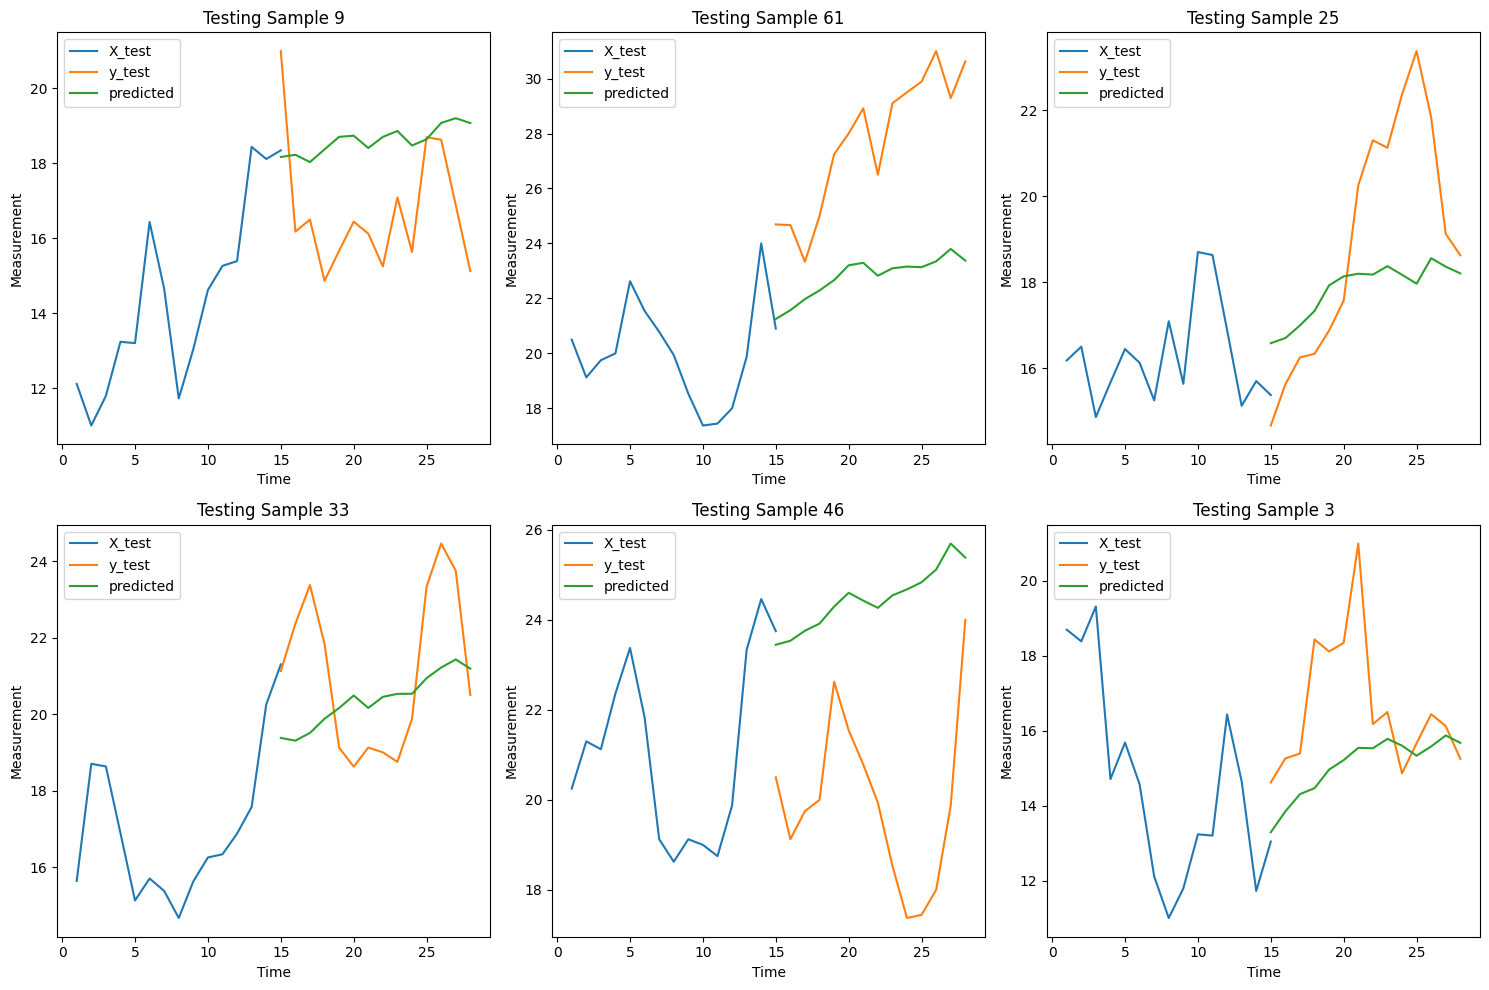

In [ ]:
# Number of random samples to display
num_samples = 6

# Create a grid for plotting
plt.figure(figsize=(15, 10))

# Iterate through the selected random samples
for i in range(num_samples):
    plt.subplot(2, 3, i+1)  # Create a subplot in the 2x3 grid
    sample_index = np.random.randint(0, len(X_test))  # Randomly select a sample index

    plt.plot(np.arange(1, n_steps+1, 1), X_test[sample_index, :, 0])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), y_test[sample_index, :])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), predicted_temp1[sample_index, :])

    plt.title('Testing Sample ' + str(sample_index))
    plt.ylabel('Measurement')
    plt.xlabel('Time')
    plt.legend(['X_test', 'y_test', 'predicted'], loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Compared to base model, the Nadam optimizer worked well to overcome the overfitting to an extent. It can also be noted that model 1 is unable to predict small variations very well. Reducing the n_steps in the model architecture may help but it may also lead to excessive underfitting.

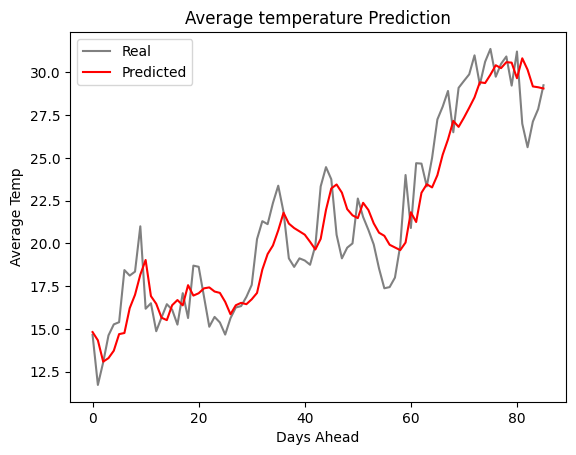

In [ ]:
#Visualize the real vs. predicted values for one day forecasting horizon.
plot_predictions(y_test[:,0],predicted_temp1[:,0])

####Optimization 2

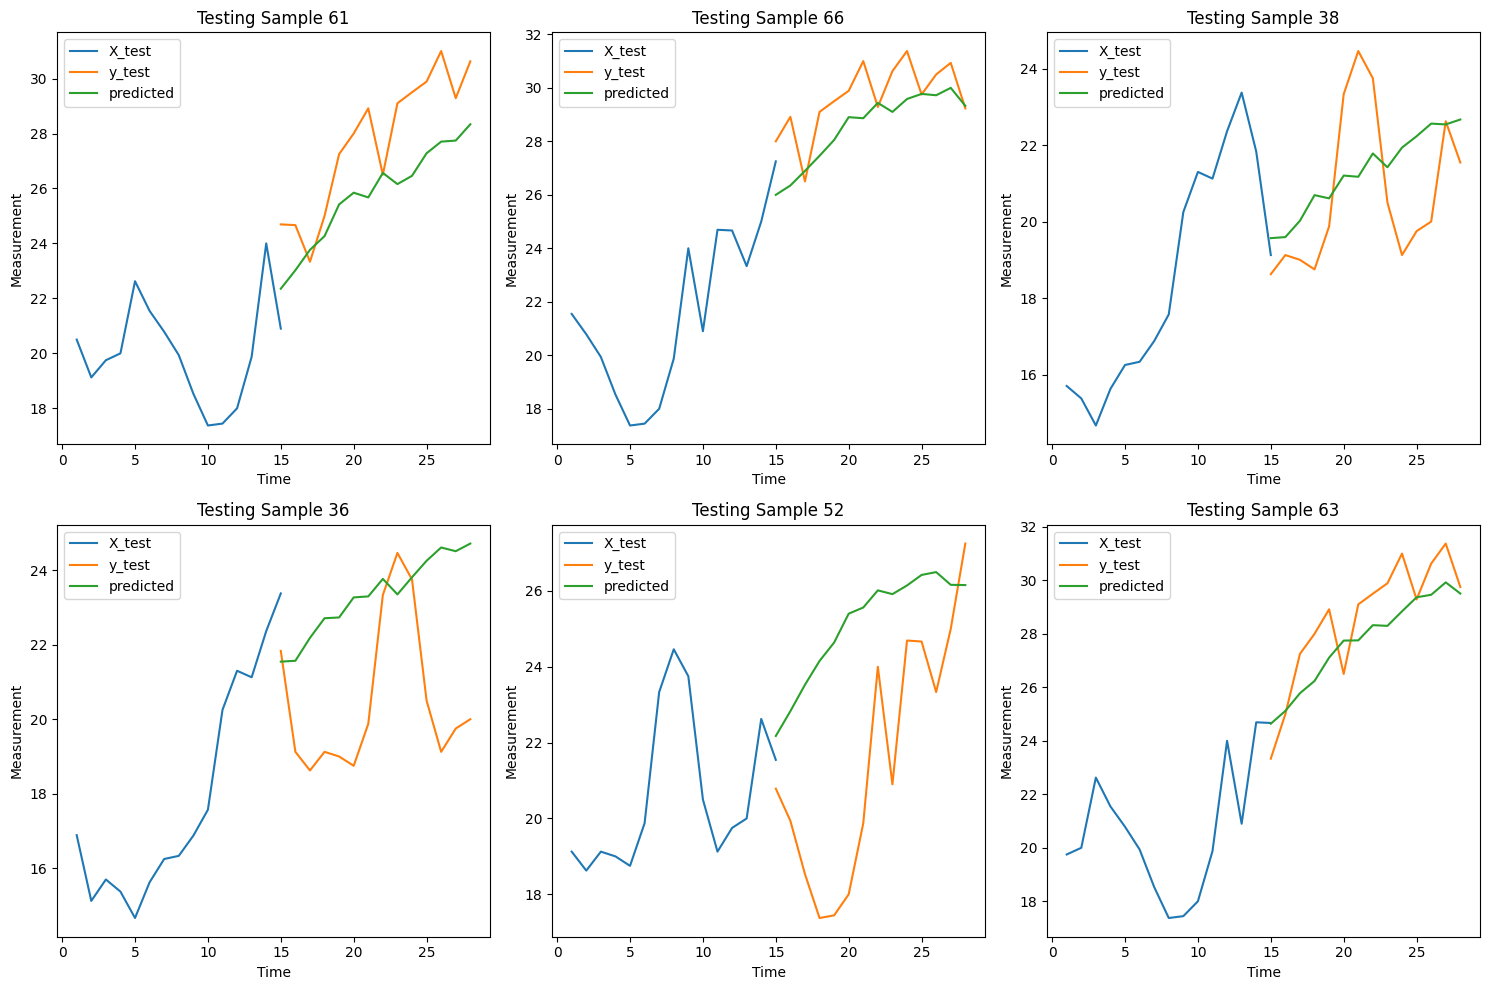

In [ ]:
# Number of random samples to display
num_samples = 6

# Create a grid for plotting
plt.figure(figsize=(15, 10))

# Iterate through the selected random samples
for i in range(num_samples):
    plt.subplot(2, 3, i+1)  # Create a subplot in the 2x3 grid
    sample_index = np.random.randint(0, len(X_test))  # Randomly select a sample index

    plt.plot(np.arange(1, n_steps+1, 1), X_test[sample_index, :, 0])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), y_test[sample_index, :])
    plt.plot(np.arange(n_steps, n_steps+forecasting_horizon, 1), predicted_temp2[sample_index, :])

    plt.title('Testing Sample ' + str(sample_index))
    plt.ylabel('Measurement')
    plt.xlabel('Time')
    plt.legend(['X_test', 'y_test', 'predicted'], loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Finally, Model 2 exhibits a higher degree of convergence between its predicted values and the true values. Sample visualizations vividly illustrate Model 2's capacity to adeptly adapt to fluctuations and variations in the data. This might be beneficial when capturing intricate patterns and longer-term dependencies.

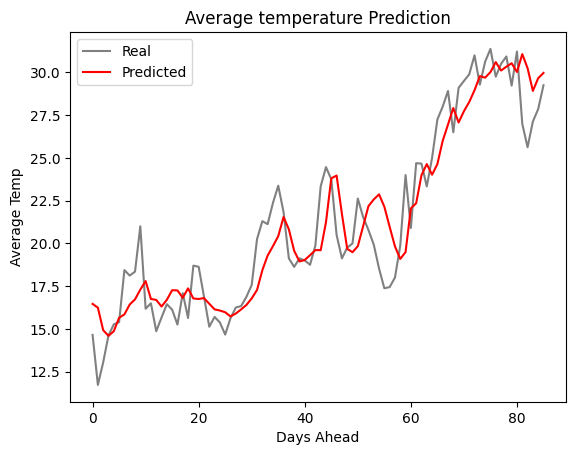

In [ ]:
#Visualize the real vs. predicted values for one day forecasting horizon.
plot_predictions(y_test[:,0],predicted_temp2[:,0])

####Model Comparision

In [ ]:
# Initialize an empty DataFrame to store MAE values
mae_data = pd.DataFrame(columns=['Base_Model', 'Model_1', 'Model_2'])

# Define function to calculate and add MAE values for each model
def calculate_mae(model_name, predicted_values):
    mae_values = []
    for i in range(forecasting_horizon):
        mae = mean_absolute_error(y_test[:, i], predicted_values[:, i])
        mae_values.append(mae)
    return mae_values

# Calculate MAE values for each model
mae_data['Base_Model'] = calculate_mae('Base_Model', predicted_temp)
mae_data['Model_1'] = calculate_mae('Model_1', predicted_temp1)
mae_data['Model_2'] = calculate_mae('Model_2', predicted_temp2)

# Display the MAE data in tabular form
print(mae_data)


    Base_Model   Model_1   Model_2
0     1.768207  1.641999  1.602404
1     2.125575  1.973553  1.872340
2     2.336408  2.242859  2.095759
3     2.435620  2.436687  2.226960
4     2.550534  2.596058  2.351169
5     2.730117  2.686864  2.570334
6     2.861412  2.701731  2.509813
7     2.834634  2.697031  2.622390
8     2.902344  2.719539  2.592746
9     2.930264  2.675325  2.796025
10    2.972303  2.595309  2.822326
11    2.978538  2.674333  2.827793
12    2.974931  2.695398  2.672041
13    2.951970  2.681112  2.563115


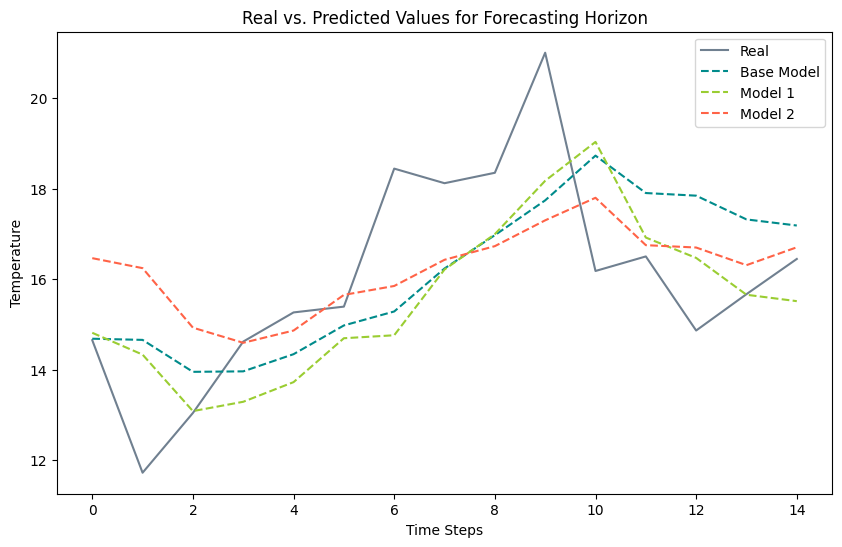

In [ ]:
# Create a single chart for real vs. predicted values
plt.figure(figsize=(10, 6))

# Plot real values
plt.plot(y_test[:15, 0], color="slategrey", label="Real") #forecasting_horizon + 1 to visualize complete forecast

# Plot predicted values of each model
plt.plot(predicted_temp[:15, 0], color="darkcyan",linestyle='dashed', label="Base Model")
plt.plot(predicted_temp1[:15, 0], color="yellowgreen", linestyle='dashed', label="Model 1")
plt.plot(predicted_temp2[:15, 0], color="tomato", linestyle='dashed', label="Model 2")

plt.title("Real vs. Predicted Values for Forecasting Horizon")
plt.xlabel("Days ahead")
plt.ylabel("Temperature")
plt.legend()
plt.show()


- **Base Model:**

The Base Model demonstrates a consistent MAE across the forecasting horizon, with values ranging from approximately 1.77 to 2.97.
It exhibits a relatively stable performance with minimal fluctuations in MAE over the 14-day period.
While the Base Model provides decent forecasting results, there may be room for improvement in capturing more complex patterns in the data.

- **Model 1:**

Model 1 shows lower MAE values compared to the Base Model across the forecasting horizon.
It achieves a more accurate forecast, with MAE values ranging from approximately 1.64 to 2.72.
Model 1 demonstrates a steady improvement in performance as the forecasting horizon progresses, indicating its ability to capture longer-term dependencies.

- **Model 2:**

Model 2 consistently outperforms both the Base Model and Model 1 in terms of MAE.
It achieves the lowest MAE values, ranging from approximately 1.60 to 2.82.
Model 2 maintains its accuracy throughout the 14-day forecasting horizon and consistently provides the most accurate predictions.

<br>

 The choice between these models depends on the specific forecasting requirements and the trade-off between complexity and accuracy. Model 1, with the Nadam optimizer, offers a reasonable balance between simplicity and accuracy, making it a suitable choice for forecasting tasks where moderate complexity suffices. On the other hand, Model 2, with its more elaborate architecture, might be beneficial when capturing intricate patterns and longer-term dependencies is critical, even if it comes at the cost of slightly varying performance.




 **Model Refinement**

 * Use transfer learning:
Transfer learning can be used to improve the performance of the model. This involves training the model on a related task, such as forecasting the weather in a different location. This can help the model to learn more general patterns in the data, which can lead to better predictions.

* Use a wider variety of data: In addition to historical weather data, the model can also be trained on other data, such as satellite imagery, land cover data, and climate models. This can help the model to learn more about the underlying physical processes that drive the weather.

* Use a more complex model: LSTM models are a good starting point for weather forecasting, but they can be improved by using more complex models, such as deep learning models. These models can learn more complex patterns in the data, which can lead to more accurate predictions.



**Model use in business**

- Improved decision-making: Businesses can use accurate weather forecasts to make better decisions about planning, scheduling, and resource allocation. For example, a transportation company can use weather forecasts to plan its routes and schedules, or a farmer can use weather forecasts to decide when to plant and harvest crops.
- Reduced risk: Businesses can use weather forecasts to reduce their risk of exposure to weather-related hazards. For example, a power company can use weather forecasts to plan for power outages, or a construction company can use weather forecasts to reschedule projects.
- Increased efficiency: Businesses can use weather forecasts to improve their efficiency. For example, a retailer can use weather forecasts to adjust its inventory levels, or a hotel can use weather forecasts to adjust its pricing.


### References

- Balamurugan, S 2021, ‘Weather forecasting using LSTM’, Google Colaboratory Notebook, accessed 30 August 2023, https://colab.research.google.com/github/balams81/Rain/blob/master/Weather_forecasting_LSTM.ipynb.

- Kozlov, A, Kozlova, E & Kozlov, S 2021, ‘Method of bidirectional LSTM modelling for the atmospheric temperature’, International Journal of Energy and Environmental Engineering, vol. 12, no. 2, pp. 153-161, accessed 30 August 2023 https://www.researchgate.net/publication/353882505_Method_of_Bidirectional_LSTM_Modelling_for_the_Atmospheric_Temperature

- Nazare, E 2021, ‘Building a LSTM model for weather prediction using ChatGPT to assist’, Medium, accessed 30 August 2023, https://medium.com/@eldanazare/building-a-lstm-model-for-weather-prediction-using-chatgpt-to-assist-e5294d6ff40d#:~:text=They can capture trends%2C seasonal,used for time series forecasting.

- Paperspace 2019, ‘Weather Forecast using LSTMs’, Paperspace Blog, accessed 30 August 2023, https://blog.paperspace.com/weather-forecast-using-ltsm-networks/.

- Zhang, Y & Wang, J 2021, ‘A novel deep learning model for weather forecasting based on LSTM and attention mechanism’, IEEE Access, vol. 9, pp. 9824268-9824277, accessed 30 August 2023, doi: 10.1109/ACCESS.2021.3073570.



